<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/NLP_Chapter_Comparing_Two_FIles(NLTK)_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Installing NLTK and Python supporting dependencies, packages and libraries

In [ ]:
# Clicking the code cell play button below will download and install all the following libraries
# This normally takes around ~1 minute and each step will show up in the output below.
%pip install nltk
%pip install requests
%pip install matplotlib
%pip install numpy
%pip install pandas

# Import Early Text file locally

In [16]:
import requests

# File ID from Google Drive
early = "1ggtD_CWqLUo_wRbyERwhR8j1rcPjD6ln"

# Construct the download URL
download_url1 = f"https://docs.google.com/uc?export=download&id={early}"

# Send a GET request to the download URL
response1 = requests.get(download_url1)

# Check if the request was successful
if response1.status_code == 200:
    # Define local filename to save the content
    local_file_name = "/content/early_editorials_merged_file.txt"

    # Write the content to a local file as text
    with open(local_file_name, "w", encoding='utf-8') as f:
        f.write(response1.text)

    print(f"File downloaded and saved as {local_file_name}")
else:
    print("Failed to download the file. Check the URL and permissions.")


File downloaded and saved as /content/early_editorials_merged_file.txt


# Import Late Text file locally

In [20]:
import requests

# File ID from Google Drive
late = "1yTpK4NOxz0LBh-oFwpiz2GC5Xi9rt11V"

# Construct the download URL
download_url = f"https://docs.google.com/uc?export=download&id={late}"

# Send a GET request to the download URL
response = requests.get(download_url)

# Check if the request was successful
if response.status_code == 200:
    # Define local filename to save the content
    local_file_name = "/content/lat_editorials_merged_file.txt"

    # Write the content to a local file as text
    with open(local_file_name, "w", encoding='utf-8') as f:
        f.write(response.text)

    print(f"File downloaded and saved as {local_file_name}")
else:
    print("Failed to download the file. Check the URL and permissions.")


File downloaded and saved as /content/lat_editorials_merged_file.txt


# 2. All in One Combined text import and tokenization Normalizer
# Comparing merged files
# Make two sets of data for comparision early vs. late using a function
Needs to be done from the two raw files in the folder at the same level as the notebook file
filename_early = 'early_editorials_merged_file.txt'
filename_late = 'late_editorials_merged_file.txt'






In [21]:
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Function to process a file
def process_file(filename, output_filename):
    try:
        # Open and read the text file
        with open(filename, 'rt', encoding='utf-8', errors='replace') as file:
            raw_text = file.read()

        # Sentence tokenization from raw text
        sent_tokens = sent_tokenize(raw_text)

        # Containers for cleaned data
        cleaned_sent_tokens = []
        removed_elements = {'punctuation': [], 'non_alpha': [], 'stop_words': []}

        # Process each sentence
        for sentence in sent_tokens:
            # Convert to lower case
            words = word_tokenize(sentence.lower())

            # Remove non-alphabetic tokens and filter out stop words
            cleaned_words = []
            for word in words:
                if word.isalpha():
                    if word not in stopwords.words('english'):
                        cleaned_words.append(word)
                    else:
                        removed_elements['stop_words'].append(word)
                else:
                    removed_elements['non_alpha'].append(word)
                    if any(char in string.punctuation for char in word):
                        removed_elements['punctuation'].append(word)

            # Join the cleaned words back into a sentence
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sent_tokens.append(cleaned_sentence)

        # Write the cleaned sentences to the file
        os.makedirs(os.path.dirname(output_filename), exist_ok=True)
        with open(output_filename, 'w', encoding='utf-8') as file:
            for sentence in cleaned_sent_tokens:
                file.write(sentence + '\n')

        # Generate word tokens and text objects from cleaned sentences
        cleaned_text = ' '.join(cleaned_sent_tokens)
        word_tokens = word_tokenize(cleaned_text)
        text_objects = nltk.Text(word_tokens)

        return cleaned_sent_tokens, word_tokens, text_objects, removed_elements

    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Check the file path.")
        return [], [], None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return [], [], None, None

# File paths and output paths
filename_early = '/content/early_editorials_merged_file.txt'
output_early = 'editorials\\normalized_early_GSQ_text.txt'

filename_late = '/content/late_editorials_merged_file.txt'
output_late = 'editorials\\normalized_early_GSQ_text.txt'

# Process each file
cleaned_early_sentences, early_word_tokens, early_text_objects, early_removed = process_file(filename_early, output_early)
cleaned_late_sentences, late_word_tokens, late_text_objects, late_removed = process_file(filename_late, output_late)

# Output results
print("Early File:")
print("Number of cleaned sentences:", len(cleaned_early_sentences))
print("Number of word tokens:", len(early_word_tokens))
print("Number of text objects:", len(early_text_objects))
print("Early removed elements:", early_removed)

print("\nLate File:")
print("Number of cleaned sentences:", len(cleaned_late_sentences))
print("Number of word tokens:", len(late_word_tokens))
print("Number of text objects:", len(late_text_objects))
print("Late removed elements:", late_removed)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Error: The file '/content/early_editorials_merged_file.txt' was not found. Check the file path.
Error: The file '/content/late_editorials_merged_file.txt' was not found. Check the file path.
Early File:
Number of cleaned sentences: 0
Number of word tokens: 0


TypeError: object of type 'NoneType' has no len()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 5. Exploratory Data Analysis (EDA)

Token Frequency Analysis

# TFA1 Average sentence length

In [ ]:
print("Early File:")
print("Number of sentences:", len(cleaned_early_sentences))
print("Number of word tokens:", len(early_word_tokens))
# Calculate the average sentence length
average_sentence_length_early = len(early_word_tokens) / len(cleaned_early_sentences)
print("Average sentence length for early is:", average_sentence_length_early)

print("\nLate File:")
print("Number of sentences:", len(cleaned_late_sentences))
print("Number of word tokens:", len(late_word_tokens))
# Calculate the average sentence length
average_sentence_length_late = len(late_word_tokens) / len(cleaned_late_sentences)
print("Average sentence length for early is:", average_sentence_length_late)



Early File:
Number of sentences: 284
Number of word tokens: 3144
Average sentence length for early is: 11.070422535211268

Late File:
Number of sentences: 287
Number of word tokens: 3240
Average sentence length for early is: 11.289198606271777


# TFA2 Word frequency distributions

In [ ]:
#Top 25 most common words with their counts
fdEarly = nltk.FreqDist(early_text_objects)
print("Most common words in early file:",fdEarly.most_common(25))

fdLate = nltk.FreqDist(late_text_objects)
print("Most common words in late file:",fdLate.most_common(25))

Most common words in early file: [('science', 199), ('general', 108), ('school', 67), ('teachers', 53), ('high', 49), ('one', 32), ('education', 28), ('new', 28), ('course', 25), ('college', 24), ('year', 22), ('university', 22), ('elementary', 20), ('work', 19), ('teaching', 17), ('courses', 16), ('schools', 16), ('special', 15), ('junior', 15), ('may', 15), ('physics', 14), ('club', 14), ('pupils', 14), ('michigan', 14), ('free', 13)]
Most common words in late file: [('science', 144), ('education', 78), ('research', 67), ('educational', 26), ('good', 25), ('learning', 24), ('standard', 22), ('journal', 19), ('gold', 19), ('researchers', 19), ('students', 17), ('scientific', 16), ('work', 15), ('would', 14), ('dewey', 14), ('us', 13), ('also', 13), ('teaching', 12), ('issue', 12), ('use', 12), ('quality', 12), ('nclb', 12), ('children', 12), ('could', 12), ('articles', 11)]


# TFA3 Lexical Diversity
Higher lexical diversity points to a more varied vocabulary

In [ ]:
lexical_diversity_early = len(set(early_word_tokens)) / len(early_word_tokens)
lexical_diversity_late = len(set(late_word_tokens)) / len(late_word_tokens)

print("Lexical diversity for early file:", lexical_diversity_early)
print("Lexical diversity for late file:", lexical_diversity_late)


Lexical diversity for early file: 0.3880407124681934
Lexical diversity for late file: 0.43950617283950616


# TFA4 Word Length Distribution

In [ ]:
# Average word length
avg_word_length_early = sum(len(word) for word in early_word_tokens) / len(early_word_tokens)
avg_word_length_late = sum(len(word) for word in late_word_tokens) / len(late_word_tokens)

print("Average word length for early file:", avg_word_length_early)
print("Average word length for late file:", avg_word_length_late)


Average word length for early file: 6.74236641221374
Average word length for late file: 7.292901234567902


# TFA 5 Bigrams and Collocations

In [ ]:
from nltk import bigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# For early file
bigram_measures_early = BigramAssocMeasures()
finder_early = BigramCollocationFinder.from_words(early_word_tokens)
print("Common bigrams in early file:", finder_early.nbest(bigram_measures_early.pmi, 10))

# For late file
bigram_measures_late = BigramAssocMeasures()
finder_late = BigramCollocationFinder.from_words(late_word_tokens)
print("Common bigrams in late file:", finder_late.nbest(bigram_measures_late.pmi, 10))


Common bigrams in early file: [('accident', 'stumbles'), ('according', 'capacity'), ('actually', 'performed'), ('addresses', 'recognized'), ('admirable', 'recommend'), ('adopted', 'report'), ('agencies', 'describes'), ('agreement', 'regard'), ('albany', 'wildman'), ('alphabet', 'smoke')]
Common bigrams in late file: [('ability', 'learn'), ('absent', 'addressing'), ('accountability', 'requirements'), ('acquisition', 'facts'), ('addressing', 'counts'), ('advancement', 'appreciation'), ('aesthetic', 'properties'), ('ages', 'london'), ('alexandra', 'schindel'), ('alvermann', 'sharing')]


# TFA 6 Unique Words Over Time

In [ ]:
unique_words_early = set(early_word_tokens)
unique_words_late = set(late_word_tokens)

print("Number of unique words in early file:", len(unique_words_early))
print("Number of unique words in late file:", len(unique_words_late))


Number of unique words in early file: 1220
Number of unique words in late file: 1424


# This follows on the last but generates list of words that are unique to that corpus.

In [ ]:
# Convert word tokens to sets for set operations
unique_words_early = set(early_word_tokens)
unique_words_late = set(late_word_tokens)

# Find words that are in the early set but not in the late set
exclusive_to_early = unique_words_early - unique_words_late

# Find words that are in the late set but not in the early set
exclusive_to_late = unique_words_late - unique_words_early

print("Words exclusive to early set:", exclusive_to_early)
print("\nWords exclusive to late set:", exclusive_to_late)


Words exclusive to early set: {'small', 'electric', 'sought', 'subjects', 'judgment', 'termed', 'kalamazoo', 'nine', 'china', 'lecture', 'divided', 'pretentious', 'bound', 'periodical', 'soon', 'richard', 'discoursed', 'lines', 'usage', 'contribute', 'needs', 'suitability', 'providence', 'said', 'encouraged', 'albany', 'whose', 'columbia', 'hotel', 'provoked', 'advised', 'miller', 'title', 'webb', 'situation', 'ably', 'stratification', 'market', 'subscribers', 'es', 'continued', 'suggestive', 'craig', 'numerous', 'enough', 'forty', 'richardson', 'full', 'expound', 'ohio', 'souled', 'carrying', 'seldom', 'beautiful', 'namely', 'running', 'glad', 'dinners', 'dissolve', 'appeared', 'laboratories', 'wedel', 'alabama', 'consideration', 'magazine', 'horace', 'classical', 'recommend', 'destroying', 'plea', 'reception', 'alphabet', 'iron', 'missouri', 'temporarily', 'connection', 'thirty', 'executive', 'grand', 'expected', 'hygiene', 'mary', 'staff', 'historical', 'appropriate', 'returns', 'as

# TFA 7 Sentiment Analysis needs work

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

# Analyzing sentiment for the early and late files
# Assuming 'cleaned_early_GSQText' and 'cleaned_late_GSQText' are strings containing your cleaned text
sentiment_early = analyze_sentiment(cleaned_early_sentences)
sentiment_late = analyze_sentiment(cleaned_late_sentences)

print("Sentiment for early file:", sentiment_early)
print("Sentiment for late file:", sentiment_late)



# TFA 8 Lexical Dispersion still doesn't seem to work correctly

<Figure size 1200x400 with 0 Axes>

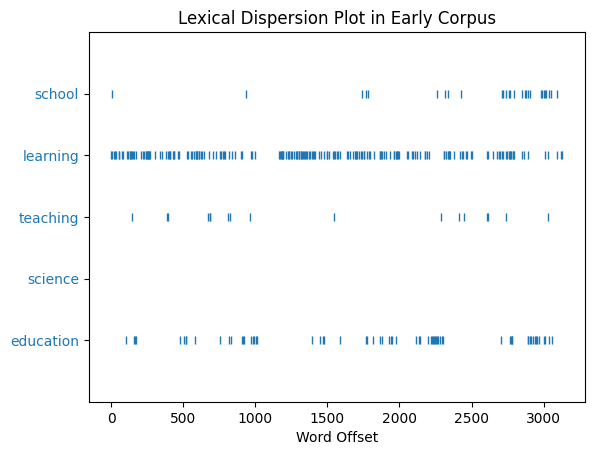

<Figure size 1200x400 with 0 Axes>

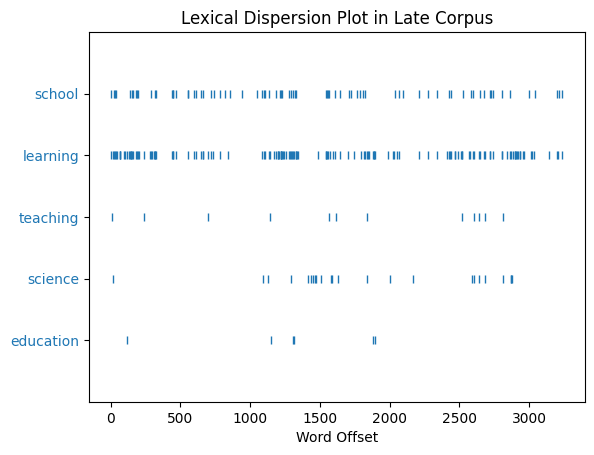

In [ ]:
import nltk
import matplotlib.pyplot as plt
from nltk.text import Text

# Assuming cleaned_early_GSQ_wordTokens and cleaned_late_GSQ_wordTokens are your lists of word tokens
# Convert word tokens into NLTK Text objects
text_early = early_text_objects
text_late = late_text_objects

# List of words to examine
target_words = ['education', 'science', 'teaching', 'learning', 'school']  # Modify this list as needed

# Generate dispersion plot for the early corpus
plt.figure(figsize=(12, 4))
text_early.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Early Corpus")
plt.show()

# Generate dispersion plot for the late corpus
plt.figure(figsize=(12, 4))
text_late.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Late Corpus")
plt.show()


# TFA N-grams and collocations

In [ ]:
# display frequency of highest 25 bigrams
finder = nltk.collocations.BigramCollocationFinder.from_words(early_text_objects)
finder.ngram_fd.tabulate(50)
finder2 = nltk.collocations.BigramCollocationFinder.from_words(late_text_objects)
finder2.ngram_fd.tabulate(50)

     ('general', 'science')          ('high', 'school')     ('science', 'teachers')          ('junior', 'high')             ('new', 'york')     ('teachers', 'college')   ('elementary', 'science')    ('science', 'education')         ('high', 'schools')      ('science', 'courses')          ('senior', 'high')         ('science', 'club')      ('special', 'science')      ('board', 'education')     ('school', 'education')      ('science', 'general')             ('per', 'week')       ('school', 'science')            ('sent', 'free')        ('normal', 'school')  ('university', 'michigan')     ('college', 'columbia')  ('columbia', 'university')          ('science', 'one')    ('physics', 'chemistry')     ('special', 'sciences')     ('science', 'teaching')       ('science', 'course')          ('ninth', 'grade') ('specialized', 'sciences') ('introductory', 'science')          ('state', 'board')         ('science', 'work') ('education', 'university')      ('editorial', 'board')            ('york', 

In [ ]:
# display frequency of highest 25 trigrams
finder = nltk.collocations.TrigramCollocationFinder.from_words(early_text_objects)
finder.ngram_fd.tabulate(25)

finder2 = nltk.collocations.TrigramCollocationFinder.from_words(late_text_objects)
finder2.ngram_fd.tabulate(25)

         ('junior', 'high', 'school')          ('senior', 'high', 'school')        ('general', 'science', 'club')   ('teachers', 'college', 'columbia') ('college', 'columbia', 'university')     ('science', 'general', 'science')         ('high', 'school', 'science') ('school', 'education', 'university')               ('new', 'york', 'city')   ('general', 'science', 'quarterly')     ('general', 'science', 'general')    ('general', 'science', 'teachers')      ('general', 'science', 'course')         ('junior', 'high', 'schools')            ('year', 'junior', 'high')         ('high', 'school', 'general')      ('school', 'general', 'science')    ('general', 'science', 'required')            ('periods', 'per', 'week')  ('general', 'science', 'elementary')            ('science', 'club', 'new')            ('club', 'new', 'england')         ('normal', 'school', 'salem') ('michigan', 'schoolmasters', 'club')       ('state', 'board', 'education') 
                                    9            

NLTK Text Objects

In [ ]:
import nltk
nltk.download('stopwords')

print(early_text_objects.collocations())
print(late_text_objects.collocations())

general science; high school; new york; junior high; per week;
teachers college; sent free; ninth grade; columbia university; senior
high; college columbia; specialized sciences; york city; board
education; associate editors; editorial board; high schools; science
teachers; seventh eighth; earl glenn
None
science education; gold standard; test scores; good research; john
dewey; manuscript central; review process; student learning;
scientific literacy; teaching learning; united states; across globe;
policy practice; nancy brickhouse; way getting; getting process;
science teaching; potential influencing; plenary articles; latest
issue
None


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TFA Concordance

In [ ]:
print(early_text_objects.concordance("science"))
print(late_text_objects.concordance("science"))

Displaying 25 of 199 matches:
general science quarterly editorials general scienc
cience quarterly editorials general science national education association new 
pectively chemistry physics biology science one paper least general science pro
ogy science one paper least general science program sessions many subjects side
s many subjects sidetracked general science prominence subject appearing differ
discussion provoked subject general science general science one live issue inte
ked subject general science general science one live issue interested teachers 
 authors discoursed bearing general science later courses physics chemistry gen
s chemistry general feeling general science taught prepare future course develo
erce plan two years course required science advocated replace one year general 
 advocated replace one year general science widely adopted report assailed numb
ion special sciences must done make science general final science session dewey
ust done make science general final sc

Sentiment Analysis

Unsupervised Analysis

Topic Modeling

K-Means

LDA